Plots: CausticsLine
===================

This example illustrates how to customize the caustics plotted over data.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

import autolens as al
import autolens.plot as aplt

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


To plot a caustic, we need a `Tracer` object which performs the strong lensing calculation to produce a caustic. By
default, caustics are only plotted on source-plane images, and must be manually input to plot on image-plane images.

Lets make a simple `Tracer`.

In [2]:
lens_galaxy = al.Galaxy(
    redshift=0.5,
    mass=al.mp.EllipticalIsothermal(
        centre=(0.0, 0.0), einstein_radius=1.6, elliptical_comps=(0.2, 0.2)
    ),
)

source_galaxy = al.Galaxy(
    redshift=1.0,
    bulge=al.lp.SphericalSersic(
        centre=(0.1, 0.1), intensity=0.3, effective_radius=1.0, sersic_index=2.5
    ),
)

tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, source_galaxy])

We also need the `Grid2D` that we can use to make plots of the `Tracer`'s properties.

In [3]:
grid = al.Grid2D.uniform(shape_native=(100, 100), pixel_scales=0.05)


The `Tracer` includes its caustics as an internal property, meaning we can plot them via an `Include2D` object.

/home/jammy/venvs/PyAuto/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


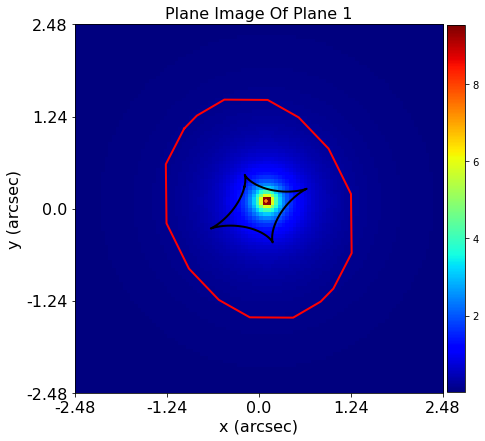

In [4]:
include_2d = aplt.Include2D(critical_curves=False, caustics=True)
tracer_plotter = aplt.TracerPlotter(tracer=tracer, grid=grid, include_2d=include_2d)
tracer_plotter.figures(source_plane=True)

The appearance of the caustics is customized using a `CausticsPlot` object.

To plot the caustics this object wraps the following matplotlib method:

 https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html

/home/jammy/venvs/PyAuto/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


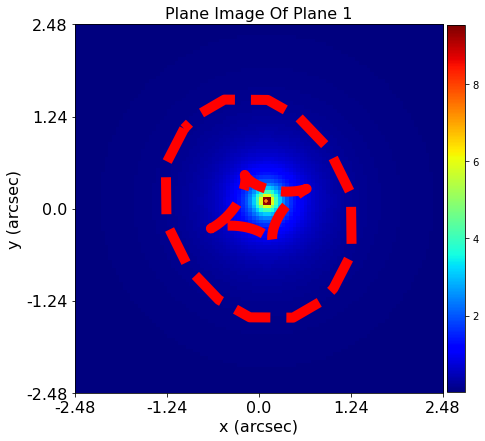

In [5]:
caustics_plot = aplt.CausticsPlot(linestyle="--", linewidth=10, c="r")

mat_plot_2d = aplt.MatPlot2D(caustics_plot=caustics_plot)

tracer_plotter = aplt.TracerPlotter(
    tracer=tracer, grid=grid, include_2d=include_2d, mat_plot_2d=mat_plot_2d
)
tracer_plotter.figures(source_plane=True)

By specifying two colors to the `CausticsPlot` object the radial and tangential caustics
will be plotted in different colors.

By default, PyAutoLens uses the same alternating colors for the caustics and caustics, so they 
appear the same color on image-plane and source-plane figures.

/home/jammy/venvs/PyAuto/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


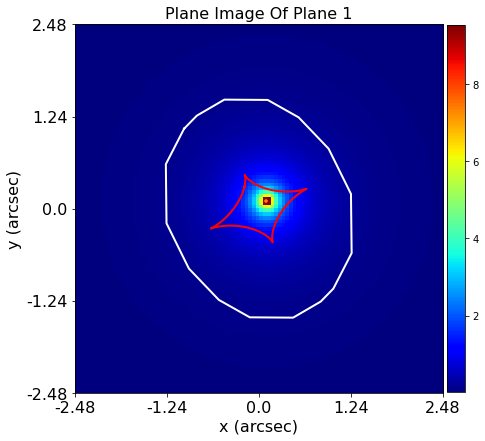

In [6]:
caustics_plot = aplt.CausticsPlot(c=["r", "w"])

mat_plot_2d = aplt.MatPlot2D(caustics_plot=caustics_plot)

tracer_plotter = aplt.TracerPlotter(
    tracer=tracer, grid=grid, include_2d=include_2d, mat_plot_2d=mat_plot_2d
)
tracer_plotter.figures(source_plane=True)


To plot caustics manually, we can pass them into a` Visuals2D` object. This is useful for plotting caustics on
figures where they are not an internal property, like an `Array2D`, as well as plotting them on image-plane images.

/home/jammy/venvs/PyAuto/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


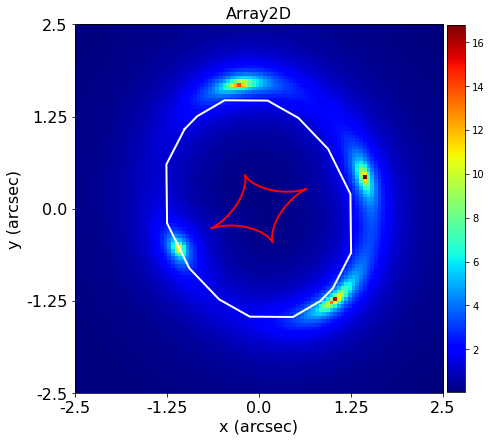

In [7]:
visuals_2d = aplt.Visuals2D(caustics=tracer.caustics_from_grid(grid=grid))
image = tracer.image_from_grid(grid=grid)

array_plotter = aplt.Array2DPlotter(
    array=image, mat_plot_2d=mat_plot_2d, visuals_2d=visuals_2d
)
array_plotter.figure()

Finish.